## Energy Efficiency Building Design 

### Project Overview
* Predicted the Cooling and Heating Load of different shaped buildings using a Multi-Output Convolutional Neural Network Model tuned with an SGD optimizer.
* Analized data distributions and correlations.
* Analyzed models error and residuals.

### Code and Resources Used 
**Python Version:** 3.7  
**Packages:** numpy, pandas, sklearn, matplotlib, seaborn, statsmodels.

### Dataset
The dataset is taken from the University of California, Irvine (UCI) Machine Learning Repository. It contains measure information (represented in 8 features) of 786 different buildings with their correspondant Heating and Cooling Load responses.

Dataset: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#

### EDA
* Features and Labels analysis and visualization.
* Correlation analysis.

### Data preparation
Data was splited into train (80%) and test (20%) sets and labels formated in tuples to train the Multi-Output Model.

### Models Building and Performance
A Multiple Output CNN with 2 and 3 layers was trained with a SGD optimizer obtaining the following results respectively:

* **CNN Output 1 (Heating Load)**: RMSE=0.4489. 
* **CNN Output 2 (Cooling Load)**: RMSE=0.9768.

### Metric chosen
**MSE** was used for the loss and **RMSE**  for the models output.



### Notebook Content

1. EDA
2. Data Preparation 
3. Model Design and Training
4. Model Evaluation and Error Analysis

### 1. EDA
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

sns.set() 

In [2]:
dataset = pd.read_csv('energy_efficiency_data.csv') 

In [3]:
df = dataset.copy()

In [4]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.shape

(768, 10)

In [ ]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


#### Features distributions

In [ ]:
variables_list = df.columns

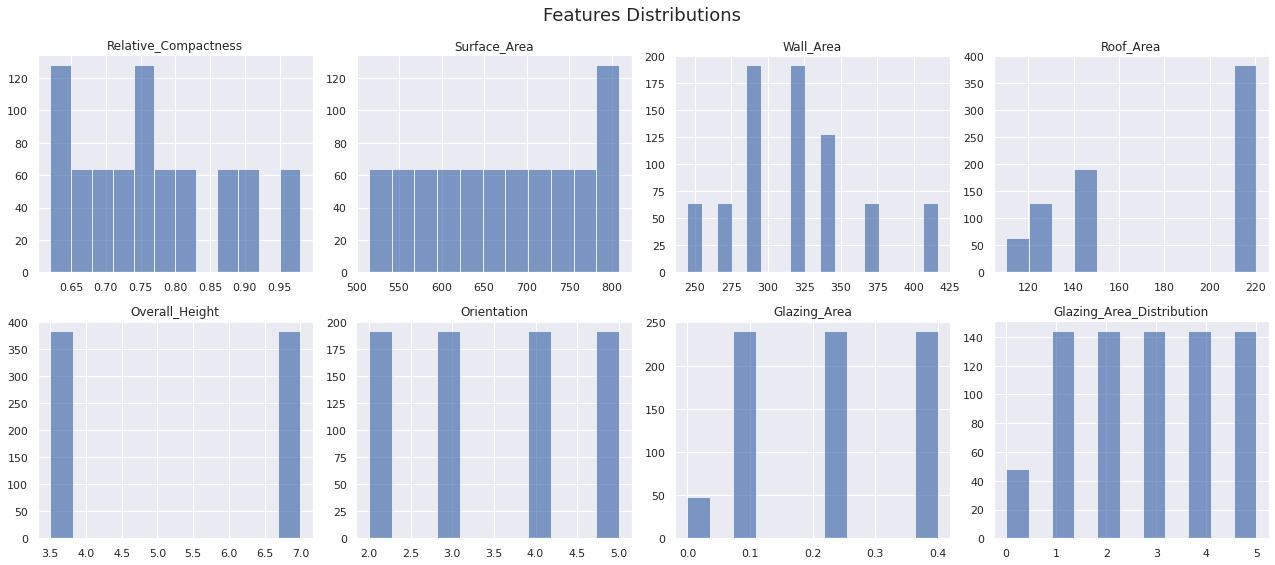

In [ ]:
cols = list(df.columns)

fig = plt.figure(figsize=(18,8))

for i in range(len(cols)-2):
    plt.subplot(2,4,i+1)
    plt.title(variables_list[i])
    plt.hist(df[variables_list[i]], alpha=0.7, bins='auto')

plt.suptitle('Features Distributions', size=18)
plt.tight_layout()

**Figure 1.** Distributions of the 8 numerical features. 

#### Labels distributions


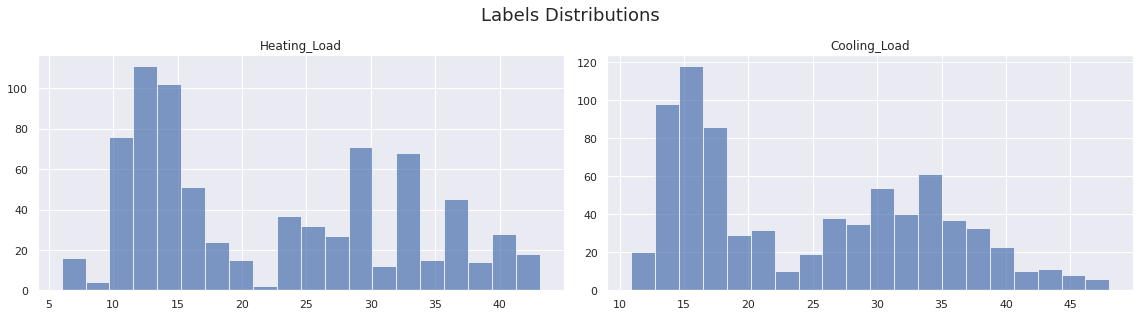

In [ ]:
fig = plt.figure(figsize=(16,8))

for i in range(len(cols)-8):
    plt.subplot(2,2,i+1)
    plt.title(variables_list[i+8])
    plt.hist(df[variables_list[i+8]], alpha=0.7, bins=20)

plt.suptitle('Labels Distributions', size=18)
plt.tight_layout()

**Figure 2.** Distributions of the 2 target variables.

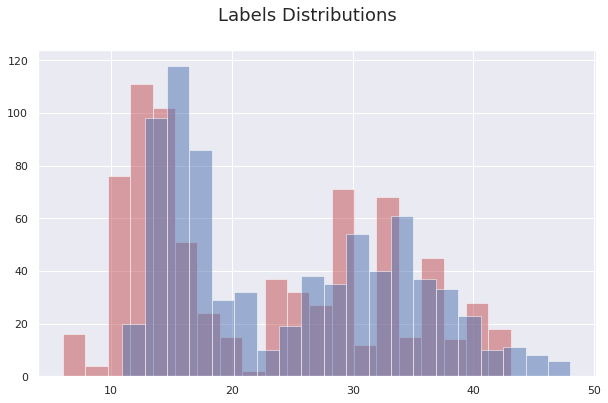

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['Heating_Load'], alpha=0.5, color='r', bins=20)
plt.hist(df['Cooling_Load'], alpha=0.5, color='b', bins=20)
plt.suptitle('Labels Distributions', size=18)
plt.show()

**Figure 2.** Distributions of the 2 target variables.

#### Correlation Analysis

In [ ]:
df_corr = df.corr()

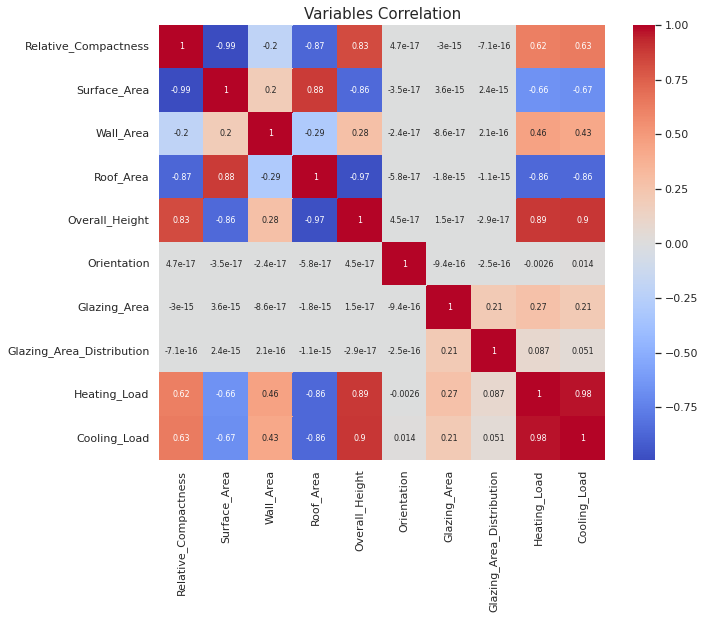

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df_corr, annot=True, annot_kws={'size': 8}, cmap='coolwarm')
plt.title('Variables Correlation', size=15)
plt.show()

**Figure 3.** Features and labels correlation matrix.

There's high correlation between many of the features and between the labels and features, especially 'Overall_Height' (positive correlation) and 'Roof_Area' (negative correlation).

### 2. Data Preparation

Shuffle the rows:

In [5]:
df = df.sample(frac=1).reset_index(drop=True) 

In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.69,735.0,294.0,220.5,3.5,5,0.10,5,11.16,14.39
1,0.64,784.0,343.0,220.5,3.5,4,0.10,3,15.12,19.37
2,0.82,612.5,318.5,147.0,7.0,3,0.25,2,25.98,26.96
3,0.66,759.5,318.5,220.5,3.5,3,0.25,3,13.01,15.80
4,0.86,588.0,294.0,147.0,7.0,5,0.10,3,26.46,27.40


Split:

In [6]:
train, test = train_test_split(df, test_size=0.2)

In [7]:
print(train.shape)
print(test.shape)

(614, 10)
(154, 10)


Formating the Labels:

In [8]:
def format_output(data):
    y1 = data.pop('Heating_Load')
    y1 = np.array(y1)
    y2 = data.pop('Cooling_Load')
    y2 = np.array(y2)

    return y1, y2

In [9]:
y_train = format_output(train) 
y_test = format_output(test)

Scaling Features:

In [10]:
scaler = StandardScaler()

In [11]:
x_train_sc = scaler.fit_transform(train)
x_test_sc = scaler.transform(test)

In [12]:
x_train_sc.shape

(614, 8)

In [13]:
x_test_sc.shape

(154, 8)

### 3. Model Design and Training

#### Model: Multi-Output Neural Network

In [28]:
tf.keras.backend.clear_session()

In [29]:
input_layer = Input(shape=(x_train_sc.shape[1])) 
dense_1 = Dense(128, activation='relu')(input_layer)
dense_2 = Dense(128, activation='relu')(dense_1)

y1_output = Dense(1, name='y1_output')(dense_2)

dense_3 = Dense(64, activation='relu')(dense_2)

y2_output = Dense(1, name='y2_output')(dense_3)

model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          1152        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                              

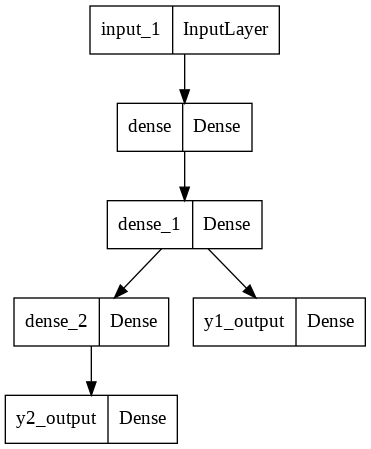

In [ ]:
plot_model(model) 

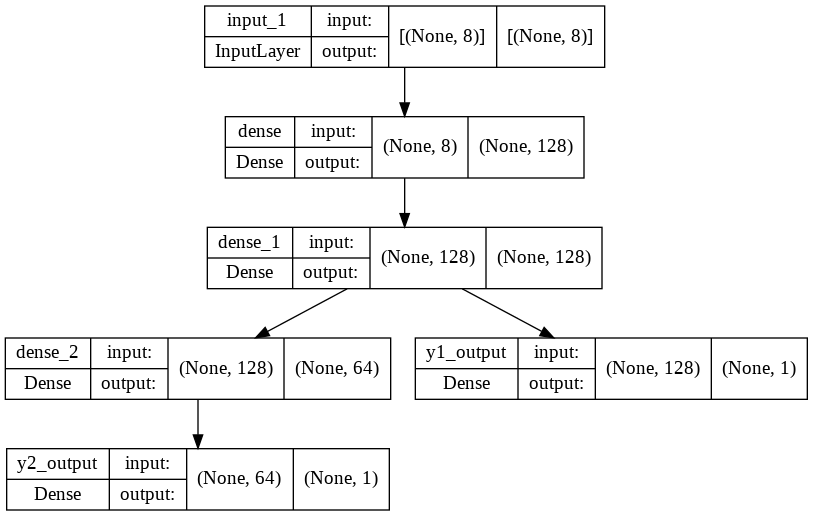

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

**Figure 4.** Multi-Output Neural Network model scheme.

In [30]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [ ]:
history = model.fit(x_train_sc, y_train, epochs=500, batch_size=10, validation_data=(x_test_sc, y_test))

Epoch 1/500
62/62 [==============================] - 0s 5ms/step - loss: 3.5729 - y1_output_loss: 0.9948 - y2_output_loss: 2.5781 - y1_output_root_mean_squared_error: 0.9974 - y2_output_root_mean_squared_error: 1.6056 - val_loss: 5.1043 - val_y1_output_loss: 1.8249 - val_y2_output_loss: 3.2794 - val_y1_output_root_mean_squared_error: 1.3509 - val_y2_output_root_mean_squared_error: 1.8109
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 2.9056 - y1_output_loss: 0.7467 - y2_output_loss: 2.1590 - y1_output_root_mean_squared_error: 0.8641 - y2_output_root_mean_squared_error: 1.4693 - val_loss: 3.7364 - val_y1_output_loss: 0.9445 - val_y2_output_loss: 2.7920 - val_y1_output_root_mean_squared_error: 0.9718 - val_y2_output_root_mean_squared_error: 1.6709
Epoch 3/500
62/62 [==============================] - 0s 5ms/step - loss: 3.2328 - y1_output_loss: 0.7514 - y2_output_loss: 2.4814 - y1_output_root_mean_squared_error: 0.8668 - y2_output_root_mean_squared_error: 1.5752 

### 4. Model Evaluation and Error Analysis

Results plotting functions:

In [23]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

In [24]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [18]:
x_train_sc_df = pd.DataFrame(x_train_sc)
x_test_sc_df = pd.DataFrame(x_test_sc)

In [32]:
model.evaluate(x=x_test_sc_df, y=y_test)

5/5 [==============================] - 0s 5ms/step - loss: 1.1558 - y1_output_loss: 0.2016 - y2_output_loss: 0.9542 - y1_output_root_mean_squared_error: 0.4490 - y2_output_root_mean_squared_error: 0.9769


[1.1558310985565186,
 0.2015896886587143,
 0.9542412757873535,
 0.4489873945713043,
 0.9768527150154114]

In [33]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=x_test_sc_df, y=y_test)

5/5 [==============================] - 0s 4ms/step - loss: 1.1558 - y1_output_loss: 0.2016 - y2_output_loss: 0.9542 - y1_output_root_mean_squared_error: 0.4490 - y2_output_root_mean_squared_error: 0.9769


In [34]:
print("Loss = {}\nY1_loss = {}\nY1_rmse = {}\nY2_loss = {}\nY2_rmse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

Loss = 1.1558310985565186
Y1_loss = 0.2015896886587143
Y1_rmse = 0.4489873945713043
Y2_loss = 0.9542412757873535
Y2_rmse = 0.9768527150154114


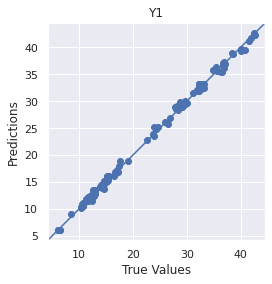

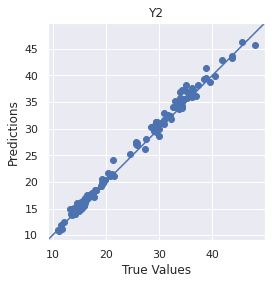

In [ ]:
Y_pred = model.predict(x_test_sc)
plot_diff(y_test[0], Y_pred[0], title='Y1')
plot_diff(y_test[1], Y_pred[1], title='Y2')


**Figure 5.** Predicted values vs real values dispersion (test set).

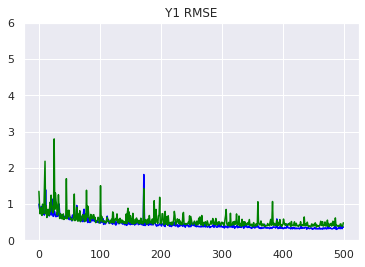

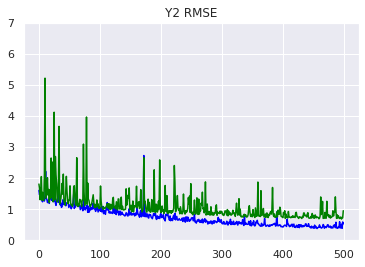

In [ ]:
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)

**Figure 6.** RMSE per epoch for both models outputs.

Results visualization:

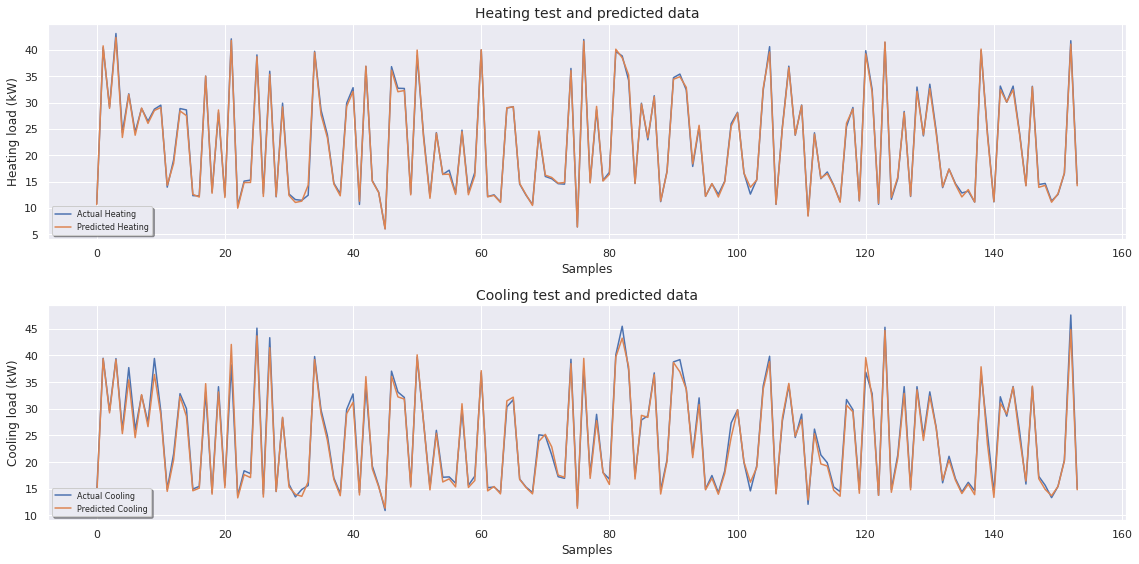

In [64]:
x_ax = range(len(y_test[0]))  
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.plot(x_ax, y_test[0], label="Actual Heating")
plt.plot(x_ax, Y_pred[0], label="Predicted Heating")
plt.title("Heating test and predicted data", fontsize=14)
plt.xlabel('Samples')
plt.ylabel('Heating load (kW)')
plt.legend(loc='lower left',fancybox=True, shadow=True, fontsize=8)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(x_ax, y_test[1], label="Actual Cooling")
plt.plot(x_ax, Y_pred[1], label="Predicted Cooling")
plt.title("Cooling test and predicted data", fontsize=14)
plt.xlabel('Samples')
plt.ylabel('Cooling load (kW)')
plt.legend(loc='lower left',fancybox=True, shadow=True, fontsize=8)
plt.grid(True)
plt.tight_layout()  
plt.show()

**Figure 7.** Model forecasts for both targets.

Our  Multi-Output Neural Network model had a good performance, obtaining better results for Y2 output (Cooling load prediction) than to Y1 output (Cooling load prediction).